In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the last checkpoint

In [2]:
df = pd.read_csv('../data/processed/train_FD001_with_RUL.csv')

print("Loaded Data Shape:", df.shape)
df.head()

Loaded Data Shape: (20631, 27)


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


Plotting Sensor Trends for a Single Engine


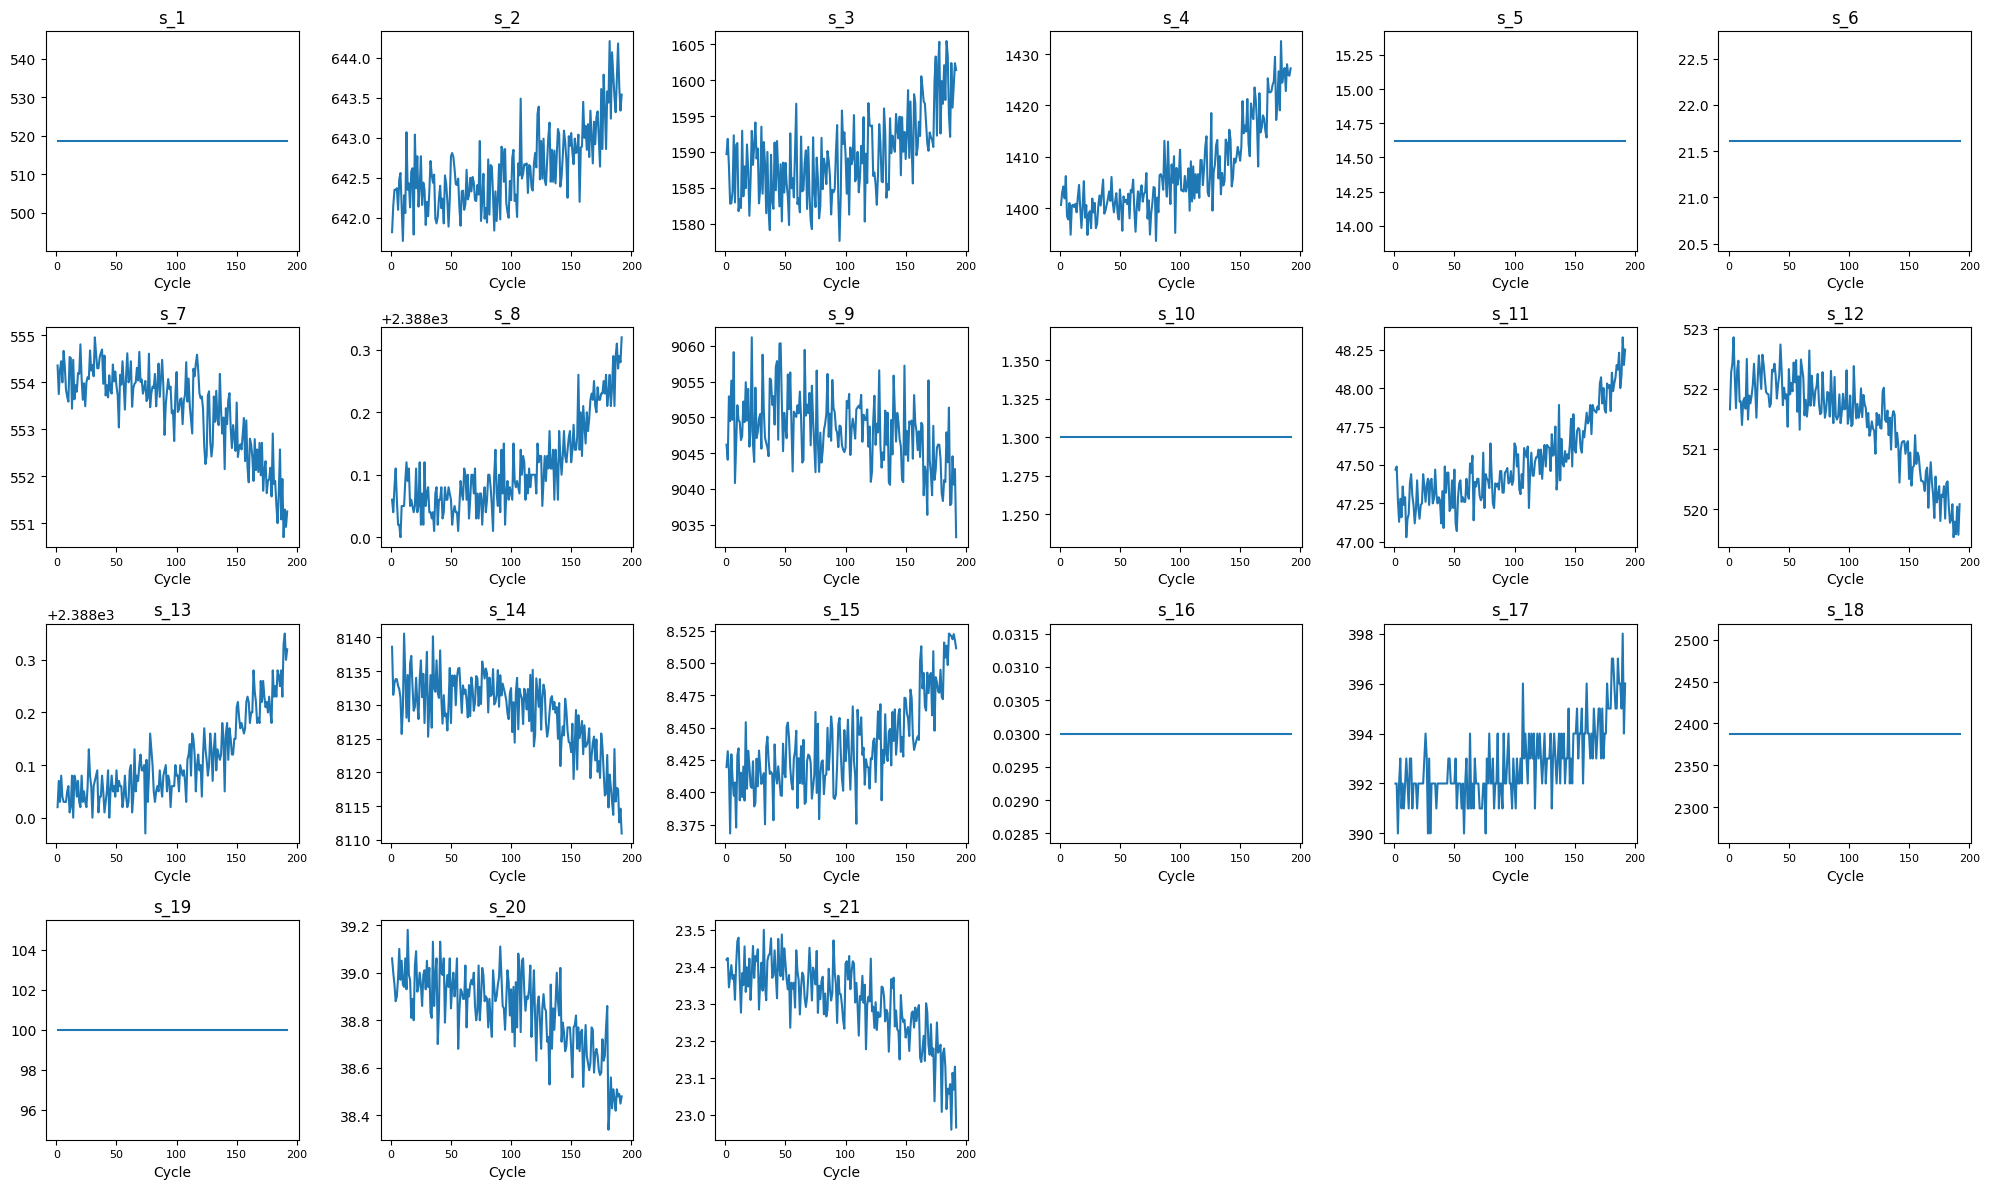

In [3]:
engine_id = 1
engine_data = df[df['unit_nr'] == engine_id]

sensors = ['s_{}'.format(i) for i in range(1, 22)]

plt.figure(figsize=(20, 12))
for i, sensor in enumerate(sensors):
    plt.subplot(4, 6, i+1) 
    plt.plot(engine_data['time_cycles'], engine_data[sensor])
    plt.title(sensor)
    plt.xlabel('Cycle')
    plt.xticks(fontsize=8)
    
plt.tight_layout()
plt.show()

In [4]:
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1, 22)] 
col_names = index_names + setting_names + sensor_names

Filtering out the ones with effectively zero variance

In [5]:
std_values = df[sensor_names].std()
flat_sensors = std_values[std_values < 1e-10]

print("Sensors with Zero Variance (Useless):")
print(flat_sensors)

sensors_to_drop = flat_sensors.index.tolist()
sensors_to_keep = [s for s in sensor_names if s not in sensors_to_drop]

print(f"\nDropping {len(sensors_to_drop)} sensors: {sensors_to_drop}")
print(f"Keeping {len(sensors_to_keep)} sensors.")

Sensors with Zero Variance (Useless):
s_1     0.000000e+00
s_5     1.776400e-15
s_10    0.000000e+00
s_16    1.387812e-17
s_18    0.000000e+00
s_19    0.000000e+00
dtype: float64

Dropping 6 sensors: ['s_1', 's_5', 's_10', 's_16', 's_18', 's_19']
Keeping 15 sensors.


Correlation Matrix (Heatmap)

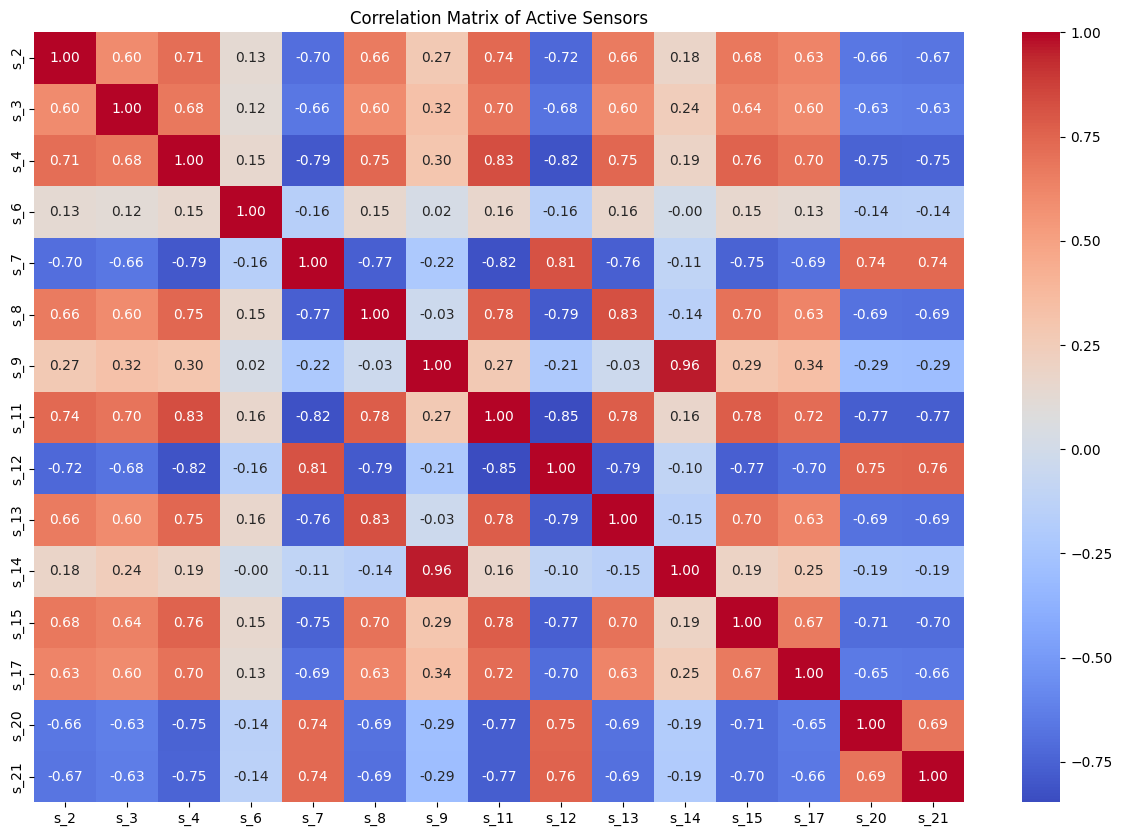

In [6]:
corr_matrix = df[sensors_to_keep].corr()
corr_matrix
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Active Sensors")
plt.show()